# Data Preprocessing

In [ ]:
# Importing Libraries
import time
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Plot Customisation
%matplotlib inline
sns.set_theme(style = "whitegrid", palette = "pastel")

In [1]:
# Importing Data
df = pd.read_pickle('../data/analysis_data/eda_customer_churn.pkl')

# Preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
# Separating & Categorising Features
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'TechSupport']
payment_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen']

categorical_features = list(set(service_features + payment_features) - set(binary_features))
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [4]:
# Features for Mapping
mapping_features = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Mapping of `Yes` and `No` to `1` and `0`
for col in mapping_features:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Mapping 'Male'/'Female' to 1/0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [5]:
# Dropping `customerID`
df.drop(columns = ['customerID'], inplace = True)

# Preview
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [6]:
# Performing the Train Test Split
X = df.drop('Churn', axis = 1)
y = df['Churn']

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Preview
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 5625 rows and 19 columns
y_train is a Series with 5625 values


In [7]:
# Creating a function for Visualising Numerical Feature Histograms
def hist_plots(data, column):
    # Creating the Figure
    fig, axes = plt.subplots(1, len(column), figsize = (12, 4), constrained_layout = True)

    # Creating the Plots
    for i, col in enumerate(column):
        sns.histplot(data = df, x = col, kde = True, color = 'tan', edgecolor = 'white', linewidth = 1, ax = axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize = 13)
        axes[i].set_xlabel(col, fontsize = 11)
        axes[i].set_ylabel('Count', fontsize = 11)
        axes[i].tick_params(labelsize = 10)

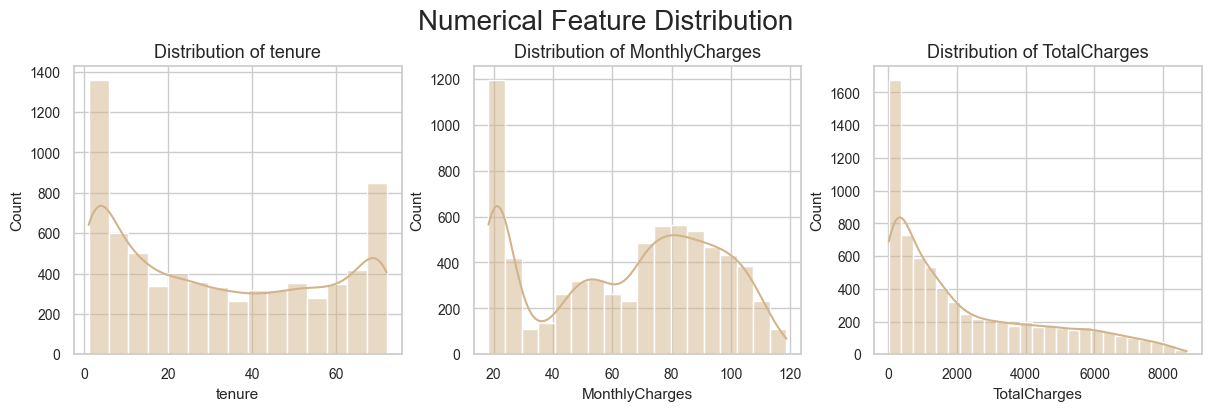

In [8]:
# Visualising Numeric Feature Distribution
hist_plots(data = df, column = numeric_features)
plt.suptitle('Numerical Feature Distribution', fontsize = 20)
plt.show();

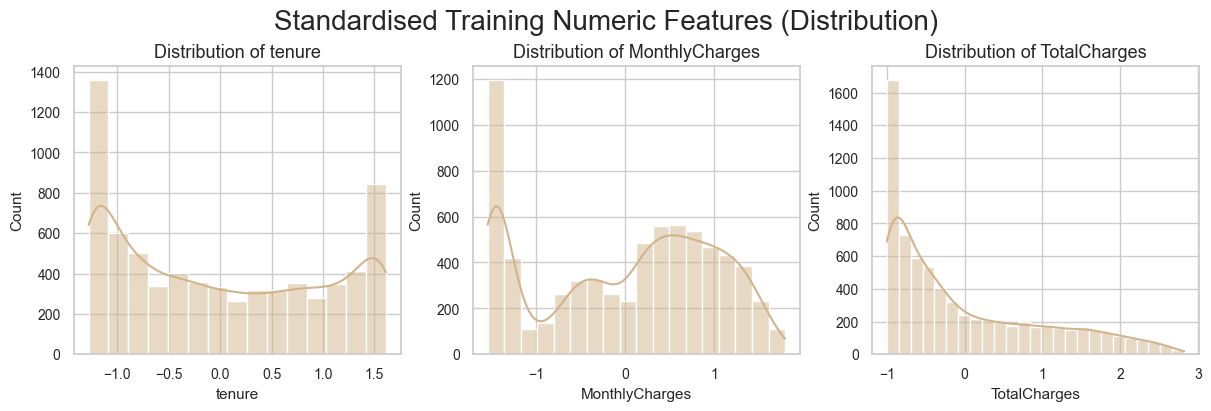

In [9]:
# Initialising StandardScaler
scaler = StandardScaler()

# Scaling Numeric Features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Plotting at scaled features
hist_plots(data = df, column = numeric_features)

# Customising the Plot
plt.suptitle('Standardised Training Numeric Features (Distribution)', fontsize = 20)

# Showing the Plot
plt.show();

In [10]:
# Initialising OneHotEncoder
ohe = OneHotEncoder(categories = 'auto', sparse_output = False, handle_unknown = 'ignore')

# Transforming & Fitting Categorical Columns
categorical_features_encoded = ohe.fit_transform(df[categorical_features])

# Making the transformed data into a DataFrame
column_names = ohe.get_feature_names_out(categorical_features)
categorical_features_encoded = pd.DataFrame(data = categorical_features_encoded, columns = column_names, index = df.index)

# Inspecting the new DataFrame
categorical_features_encoded

,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7039,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7040,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7041,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# Dropping Categorical Features from Orignial DataFrame
df = df.drop(columns = categorical_features)

# Concatenating Encoded Columns
df = pd.concat([df, categorical_features_encoded], axis = 1)

# Preview
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
# Looking at the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7032 non-null   int64  
 10  DeviceProtection_No                      7032 non-nul

In [13]:
# Applying the Transformations to the Test Data

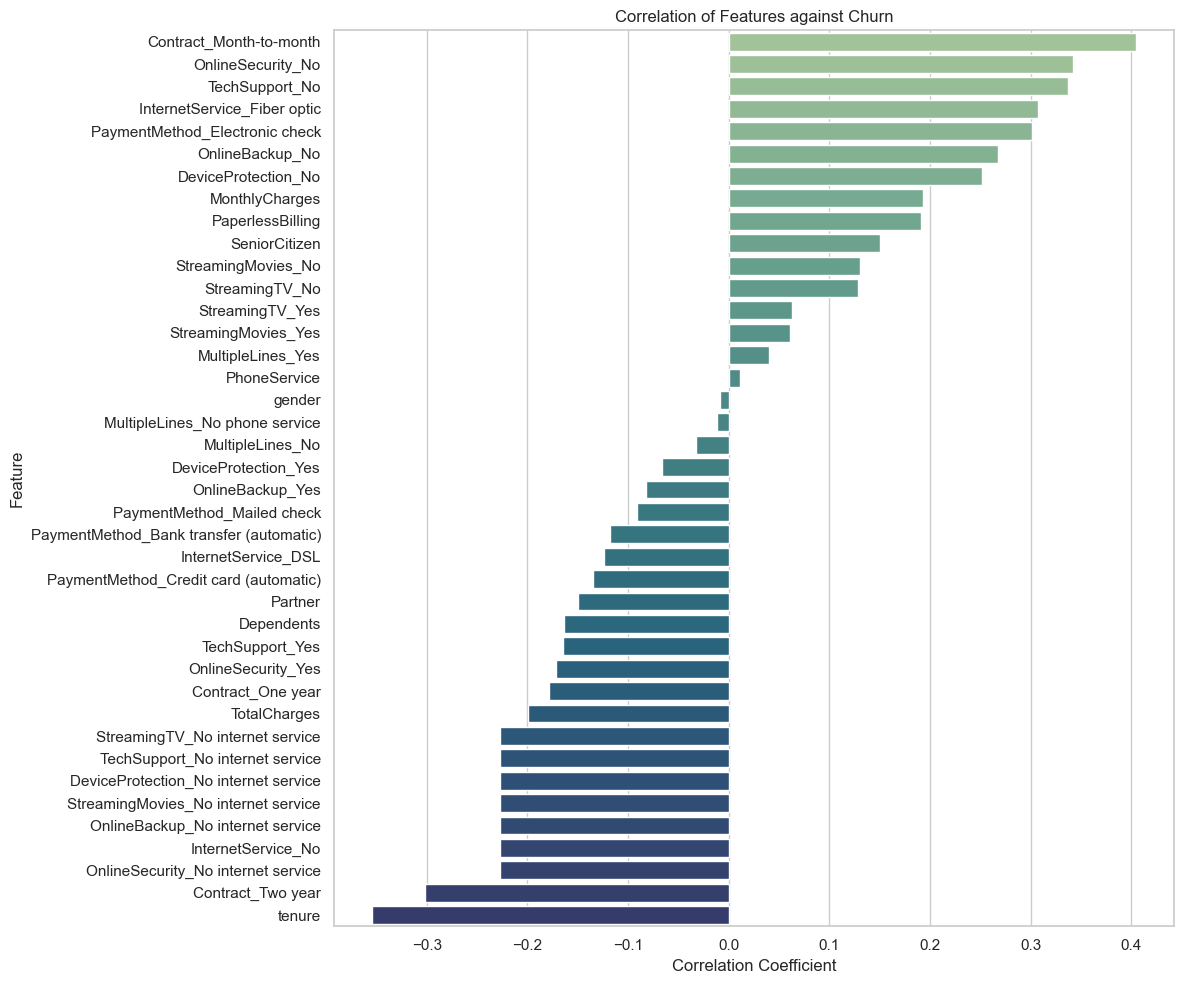

In [14]:
# Computing Correlations with the Target
churn_corr = df.corr(numeric_only = True)['Churn'].drop('Churn').sort_values(ascending = False)

# Creating the Figure
plt.figure(figsize = (12, 10))

# Plotting the Correlation
sns.barplot(x = churn_corr.values, y = churn_corr.index, hue = churn_corr.index, palette = 'crest', legend = False)

# Customising the plot
plt.title('Correlation of Features against Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True, axis = 'x')
plt.tight_layout()

# Showing the Plot
plt.show();

# Saving the Correlation to csv
churn_corr.to_csv('../results/preprocessing_churn_corr.csv', index = True, float_format = '%.4f')

In [15]:
churn_corr

Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender                                    -0.008545
MultipleLines_No phone service            -0.011691
MultipleLines_No                          -0.032654
DeviceProtec

# Correlation with Churn Insights
The correlation analysis reveals that customers with **month-to-month contracts**, **no online security** and **no tech support** are more likely to churn. In contrast, customers with **longer tenures**, **two-year contracts** and **no internet service** have lower churn rates. These are patterns that highlight the features that are most predictive and will inform our feature selection and subsequent model design.